## Scaling

In [118]:
import pandas as pd

In [119]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")

In [120]:
df.to_csv('social_net_ads.csv',index=False)

In [121]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [122]:
df=df.iloc[:,2:]

In [123]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


## Train and split

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


In [126]:
df.drop("Purchased",axis=1)

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [127]:
df["Purchased"]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [128]:
df.shape

(400, 3)

In [129]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df["Purchased"],test_size=0.25)

In [130]:
x_train

,Age,EstimatedSalary
60,27.0,20000.0
116,35.0,75000.0
145,24.0,89000.0
2,26.0,43000.0
314,39.0,79000.0
...,...,...
302,37.0,137000.0
237,37.0,80000.0
170,21.0,88000.0
76,18.0,52000.0


In [131]:
x_test

,Age,EstimatedSalary
96,35.0,25000.0
45,23.0,20000.0
253,37.0,146000.0
287,48.0,138000.0
63,32.0,120000.0
...,...,...
77,22.0,27000.0
83,35.0,88000.0
219,59.0,143000.0
229,42.0,80000.0


In [132]:
y_train

60     0
116    0
145    0
2      0
314    0
      ..
302    1
237    0
170    0
76     0
52     0
Name: Purchased, Length: 300, dtype: int64

In [133]:
y_test

96     0
45     0
253    1
287    1
63     1
      ..
77     0
83     0
219    1
229    1
308    1
Name: Purchased, Length: 100, dtype: int64

## StandardScaler

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler=StandardScaler()

In [136]:
scaler.fit(x_train)

StandardScaler()

In [137]:
x_train_scaled=scaler.transform(x_train)

In [138]:
x_test_scaled=scaler.transform(x_test)

In [139]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [140]:
x_train

,Age,EstimatedSalary
60,27.0,20000.0
116,35.0,75000.0
145,24.0,89000.0
2,26.0,43000.0
314,39.0,79000.0
...,...,...
302,37.0,137000.0
237,37.0,80000.0
170,21.0,88000.0
76,18.0,52000.0


In [141]:
x_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.526667,69503.333333
std,10.494271,32779.439099
min,18.000000,15000.000000
25%,29.000000,44000.000000
50%,37.000000,69500.000000
75%,46.000000,86000.000000
max,60.000000,150000.000000


In [142]:
x_train_scaled

,Age,EstimatedSalary
0,-1.004763,-1.512718
1,-0.241169,0.167967
2,-1.291111,0.595777
3,-1.100212,-0.809886
4,0.140629,0.290198
...,...,...
295,-0.050270,2.062556
296,-0.050270,0.320756
297,-1.577459,0.565219
298,-1.863807,-0.534865


In [143]:
import numpy as np
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.7
25%,-0.8,-0.8
50%,-0.1,-0.0
75%,0.8,0.5
max,2.1,2.5


## Effect of Scaling

<function matplotlib.pyplot.show(close=None, block=None)>

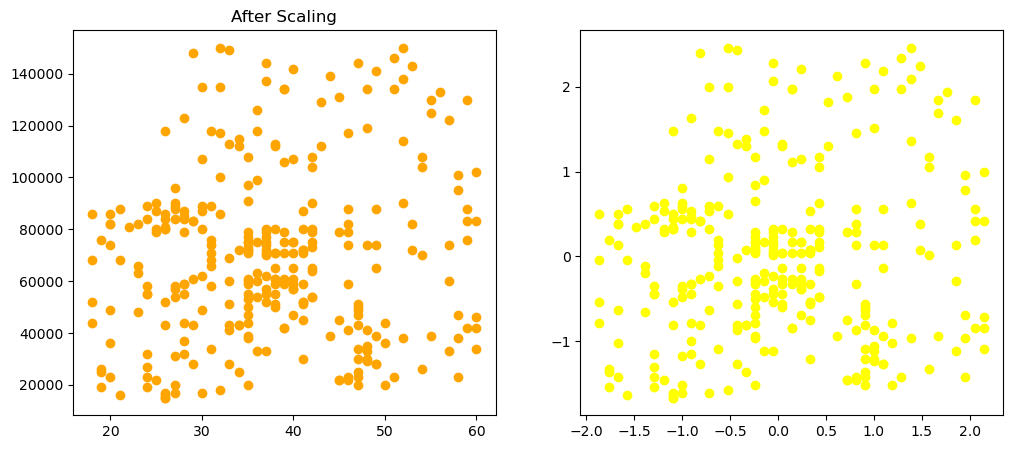

In [144]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'],color='orange')
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='yellow')
ax1.set_title("After Scaling")

plt.show

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

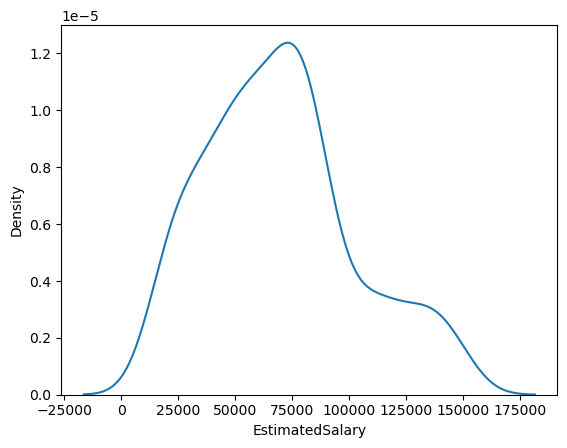

In [145]:
import seaborn as sns
sns.kdeplot(x_train['EstimatedSalary'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

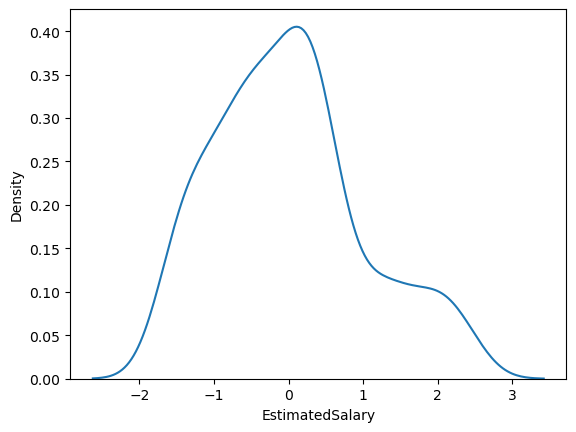

In [146]:
import seaborn as sns
sns.kdeplot(x_train_scaled['EstimatedSalary'])

In [147]:
x_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.526667,69503.333333
std,10.494271,32779.439099
min,18.000000,15000.000000
25%,29.000000,44000.000000
50%,37.000000,69500.000000
75%,46.000000,86000.000000
max,60.000000,150000.000000


In [148]:
#min-max

from sklearn.preprocessing import MinMaxScaler

scaler_min_max=MinMaxScaler()

In [149]:
scaler_min_max.fit(x_train)

MinMaxScaler()

In [150]:
x_train_min_max=scaler_min_max.transform(x_train)

In [151]:
x_test_min_max=scaler_min_max.transform(x_test)

In [152]:
x_train_min_max=pd.DataFrame(x_train_min_max,columns=x_train.columns)
x_test_min_max=pd.DataFrame(x_test_min_max,columns=x_test.columns)

In [153]:
np.round(x_train_min_max.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.5,0.4
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


In [154]:
x_test_min_max

,Age,EstimatedSalary
0,0.404762,0.074074
1,0.119048,0.037037
2,0.452381,0.970370
3,0.714286,0.911111
4,0.333333,0.777778
...,...,...
95,0.095238,0.088889
96,0.404762,0.540741
97,0.976190,0.948148
98,0.571429,0.481481


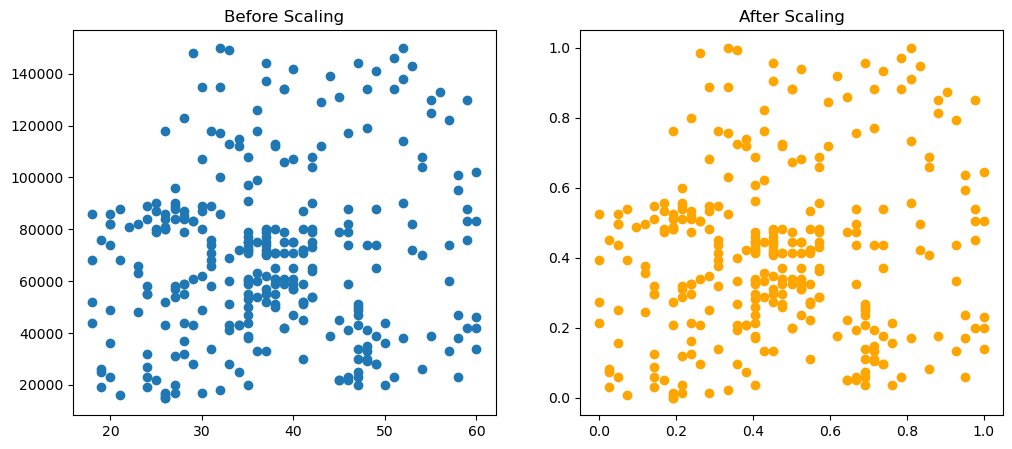

In [155]:
import matplotlib.pyplot as plt
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(x_train_min_max['Age'],x_train_min_max['EstimatedSalary'],color='orange')
ax2.set_title('After Scaling')

plt.show()

## Encoding

In [179]:
df2=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv")

In [180]:
df2.head() 

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [158]:
df2.to_csv("customor.csv",index=False)

In [159]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [160]:
df2.sample(5)

,age,gender,review,education,purchased
48,39,Female,Good,UG,Yes
30,73,Male,Average,UG,No
10,98,Female,Good,UG,Yes
41,23,Male,Good,PG,Yes
28,48,Male,Poor,School,No


In [161]:
df2=df2.iloc[:,2:-1]

In [162]:
df2.head()

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG


In [163]:
df2.shape

(50, 2)

In [164]:
x_train,x_test=train_test_split(df2,test_size=0.25)

In [165]:
x_train

,review,education
24,Average,PG
6,Good,School
12,Poor,School
38,Good,School
43,Poor,PG
28,Poor,School
4,Average,UG
30,Average,UG
5,Average,School
22,Poor,PG


In [166]:
x_train

,review,education
24,Average,PG
6,Good,School
12,Poor,School
38,Good,School
43,Poor,PG
28,Poor,School
4,Average,UG
30,Average,UG
5,Average,School
22,Poor,PG


In [167]:
df2["review"].value_counts()

review
Poor       18
Good       18
Average    14
Name: count, dtype: int64

In [168]:
df2['education'].value_counts()

education
PG        18
School    16
UG        16
Name: count, dtype: int64

In [169]:
from sklearn.preprocessing import OrdinalEncoder

In [170]:
encoder=OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [171]:
encoder.fit(x_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [172]:
x_train_encode=encoder.transform(x_train)

In [173]:
x_train_encode

array([[1., 2.],
       [2., 0.],
       [0., 0.],
       [2., 0.],
       [0., 2.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 2.],
       [0., 2.],
       [2., 2.],
       [2., 1.],
       [2., 2.],
       [1., 1.],
       [2., 2.],
       [0., 2.],
       [1., 0.],
       [2., 1.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [2., 1.],
       [1., 1.],
       [2., 0.],
       [2., 2.],
       [0., 0.],
       [2., 2.],
       [0., 1.],
       [0., 1.],
       [2., 0.],
       [0., 2.],
       [2., 0.],
       [0., 2.],
       [1., 0.],
       [2., 0.],
       [0., 0.]])

In [174]:
encoder.transform(x_test)

array([[2., 1.],
       [1., 0.],
       [0., 1.],
       [0., 2.],
       [2., 2.],
       [2., 1.],
       [1., 1.],
       [0., 2.],
       [0., 2.],
       [1., 2.],
       [1., 2.],
       [0., 1.],
       [2., 1.]])

In [181]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [182]:
df2=df2[['gender','age']]

In [183]:
df2

,gender,age
0,Female,30
1,Female,68
2,Female,70
3,Female,72
4,Female,16
5,Female,31
6,Male,18
7,Female,60
8,Female,65
9,Male,74


In [184]:
from sklearn.preprocessing import OneHotEncoder

In [191]:
ohe=OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [192]:
ohe.fit(df2[['gender']])

C:\Users\Rohitshrimangle\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse=False,
              sparse_output=False)

In [193]:
ohe.transform(df2[['gender']])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

## Handle Missing Value

In [227]:
df3=pd.read_csv("titanic_train.csv")

In [228]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [200]:
df3=df3[['Age','Fare','SibSp','Survived']]

In [201]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [202]:
df3.head()

,Age,Fare,SibSp,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [206]:
df3.isnull().sum()

Age         177
Fare          0
SibSp         0
Survived      0
dtype: int64

In [207]:
df3.isnull().mean()

Age         0.198653
Fare        0.000000
SibSp       0.000000
Survived    0.000000
dtype: float64

In [208]:
#numeric column-->mean,median

#cat--> mode

In [210]:
x_train,x_test=train_test_split(df3,test_size=0.25)

In [212]:
x_train

,Age,Fare,SibSp,Survived
19,NaN,7.2250,0,1
518,36.0,26.0000,1,1
412,33.0,90.0000,1,1
544,50.0,106.4250,1,0
47,NaN,7.7500,0,1
...,...,...,...,...
650,NaN,7.8958,0,0
791,16.0,26.0000,0,0
298,NaN,30.5000,0,1
846,NaN,69.5500,8,0


In [213]:
x_test

,Age,Fare,SibSp,Survived
551,27.0,26.0000,0,0
241,NaN,15.5000,1,1
271,25.0,0.0000,0,1
284,NaN,26.0000,0,0
113,20.0,9.8250,1,0
...,...,...,...,...
864,24.0,13.0000,0,0
668,43.0,8.0500,0,0
624,21.0,16.1000,0,0
798,30.0,7.2292,0,0


In [216]:
mean_age=x_train['Age'].mean()

In [217]:
x_train['Age'].fillna(mean_age)

19     29.509028
518    36.000000
412    33.000000
544    50.000000
47     29.509028
         ...    
650    29.509028
791    16.000000
298    29.509028
846    29.509028
849    29.509028
Name: Age, Length: 668, dtype: float64

In [219]:
x_train['Age'].fillna(mean_age).isnull().sum()

0

In [221]:
median_age=x_train['Age'].median()

In [222]:
x_train['Age'].fillna(median_age)

19     28.0
518    36.0
412    33.0
544    50.0
47     28.0
       ... 
650    28.0
791    16.0
298    28.0
846    28.0
849    28.0
Name: Age, Length: 668, dtype: float64

In [223]:
x_train['Age'].fillna(median_age).isnull().sum()

0

In [224]:
## sklearn

#simple Imputer

In [230]:
df3['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [233]:
df3['Cabin'].fillna(df3["Cabin"].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object